In [1]:
# Install necessary packages
!pip install -U torch sahi yolov8 ultralytics numpy opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 654.0/654.0 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 MB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━

In [3]:
# Check current working directory
import os
os.getcwd()

'/content'

In [4]:
# Import YOLOv8-S model
from sahi.utils.yolov8 import (
    download_yolov8s_model,
)

# Import required functions and classes
from sahi import AutoDetectionModel
from sahi.utils.cv import read_image
from sahi.utils.file import download_from_url
from sahi.predict import get_prediction, get_sliced_prediction, predict
from sahi.prediction import visualize_object_predictions
from IPython.display import Image
from numpy import asarray
import cv2

In [7]:
# Download YOLOv8-S model to 'models/yolov8s.pt'
yolov8_model_path = 'models/yolov8s.pt'
download_yolov8s_model(destination_path=yolov8_model_path)

# Download test images into demo_data folder
download_from_url('https://raw.githubusercontent.com/obss/sahi/main/demo/demo_data/small-vehicles1.jpeg', 'demo_data/small-vehicles1.jpeg')
download_from_url('https://raw.githubusercontent.com/obss/sahi/main/demo/demo_data/terrain2.png', 'demo_data/terrain2.png')

In [8]:
detection_model = AutoDetectionModel.from_pretrained(
    model_type='yolov8',
    model_path=yolov8_model_path,
    confidence_threshold=0.3,
    device="cuda:0", # or 'cpu'
)

In [12]:
# Example 1
result = get_prediction("/content/demo_data/small-vehicles1.jpeg", detection_model)

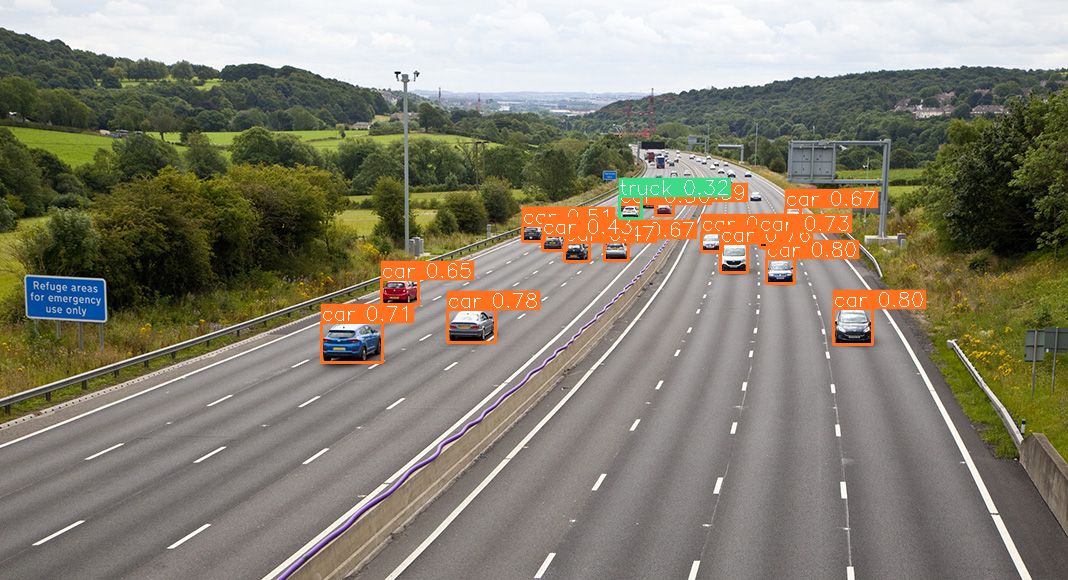

In [13]:
# Example 1
result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")

In [14]:
# Example 2
result = get_prediction("/content/demo_data//terrain2.png", detection_model)

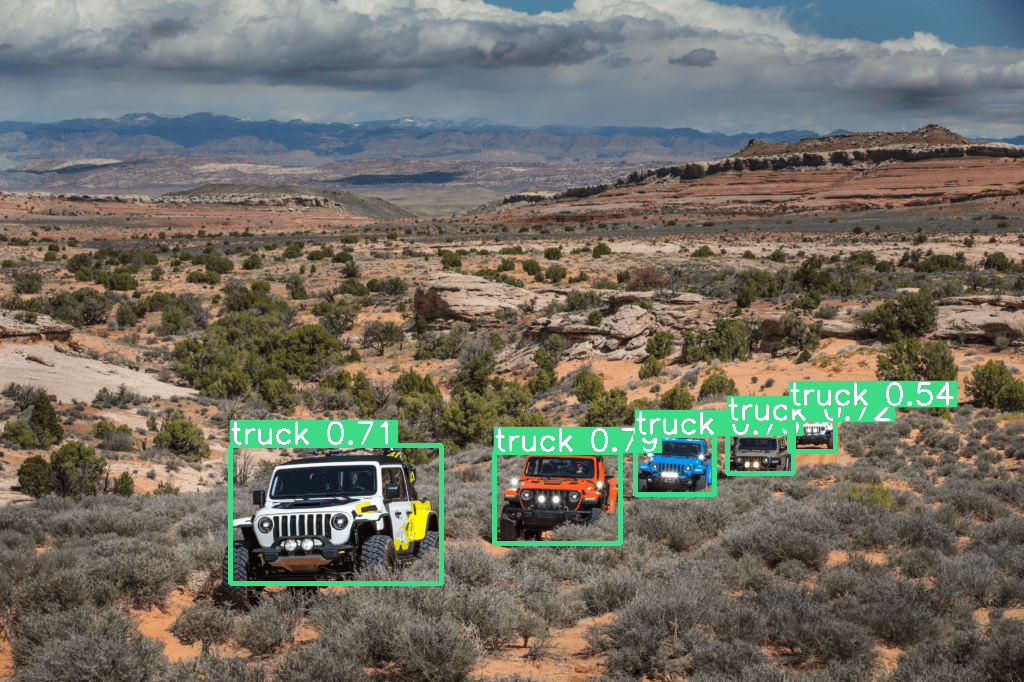

In [15]:
# Example 2
result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")

In [16]:
# Example 1
result = get_sliced_prediction(
    "/content/demo_data/small-vehicles1.jpeg",
    detection_model,
    slice_height = 128,
    slice_width = 128,
    overlap_height_ratio = 0.7,
    overlap_width_ratio = 0.7
)

Performing prediction on 338 number of slices.


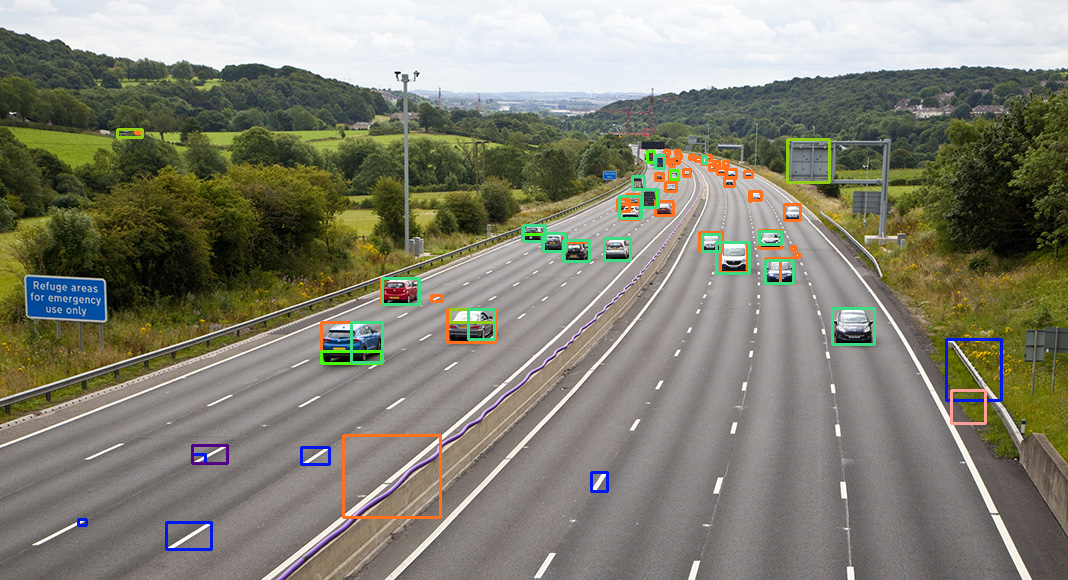

In [17]:
img = cv2.imread("/content/demo_data/small-vehicles1.jpeg", cv2.IMREAD_UNCHANGED)
img_converted = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
numpydata = asarray(img_converted)
visualize_object_predictions(
    numpydata,
    object_prediction_list = result.object_prediction_list,
    hide_labels = 1,
    output_dir='/content/demo_data',
    file_name = 'result',
    export_format = 'png'
)
Image('demo_data/result.png')